<a href="https://colab.research.google.com/github/evro23x/abstract_dog/blob/cv/hack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

In [0]:
'''
It cleans img from noise
'''
def clear_img(file_name):
  img = cv2.imread(file_name, 0)

  dilated_img = cv2.dilate(img, np.ones((7,7), np.uint8))
  bg_img = cv2.medianBlur(dilated_img, 21)
  diff_img = 255 - cv2.absdiff(img, bg_img)
  norm_img = diff_img.copy()
  cv2.normalize(diff_img, norm_img, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)
  _, thr_img = cv2.threshold(norm_img, 230, 0, cv2.THRESH_TRUNC)
  cv2.normalize(thr_img, thr_img, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)
  thr_img[thr_img < 240] = 0
  cv2.imwrite("c_" + file_name, thr_img)

'''
It resizes image
'''
def resize_img(img, scale):
  return cv2.resize(img,(img.shape[1] * scale, img.shape[0] * scale))

'''
Finding edges 
'''
def define_edged(img, min, max):
  return cv2.Canny(img, min, max)

'''
Finding contours
'''
def get_contours(edged):
  return cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[-2:]

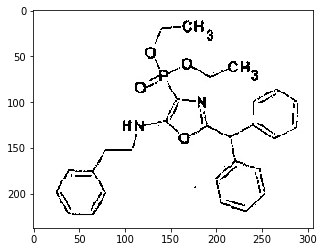

In [31]:
clear_img("0.jpg")

img = cv2.imread('c_0.jpg')

plt.imshow(img), plt.show()
plt.imsave('big.jpg', resize_img(img, 3))

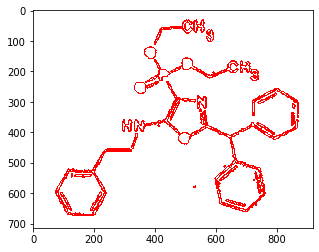

In [41]:
image = cv2.imread('big.jpg')

edged = define_edged(image, 0, 255)
contours, hierarchy = get_contours(edged)

image[::] = 255
cv2.drawContours(image, contours, -1, (255, 0, 0), 3) 

plt.imshow(image)
plt.show()

In [42]:
! apt install tesseract-ocr
! apt install libtesseract-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 35 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 4s (1,348 kB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 132684 files and directories currently installed.)
Preparing to unpack .../tesserac

In [43]:
! pip install Pillow
! pip install pytesseract


  Created wheel for pytesseract: filename=pytesseract-0.3.0-py2.py3-none-any.whl size=20970 sha256=d77a437546017708a658217250c042814acf8925b48cd7b6baff0fd3081caf47
  Stored in directory: /root/.cache/pip/wheels/78/c9/ac/4cb76bd547f9970070522439e5203ba7926c5c5c4f131583ea
Successfully built pytesseract


In [0]:
import pytesseract
from PIL import ImageEnhance, ImageFilter, Image

In [48]:
text = pytesseract.image_to_string(Image.open('big.jpg'))
print(text)